In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

In [2]:
swiss = data('swiss')

In [4]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [5]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


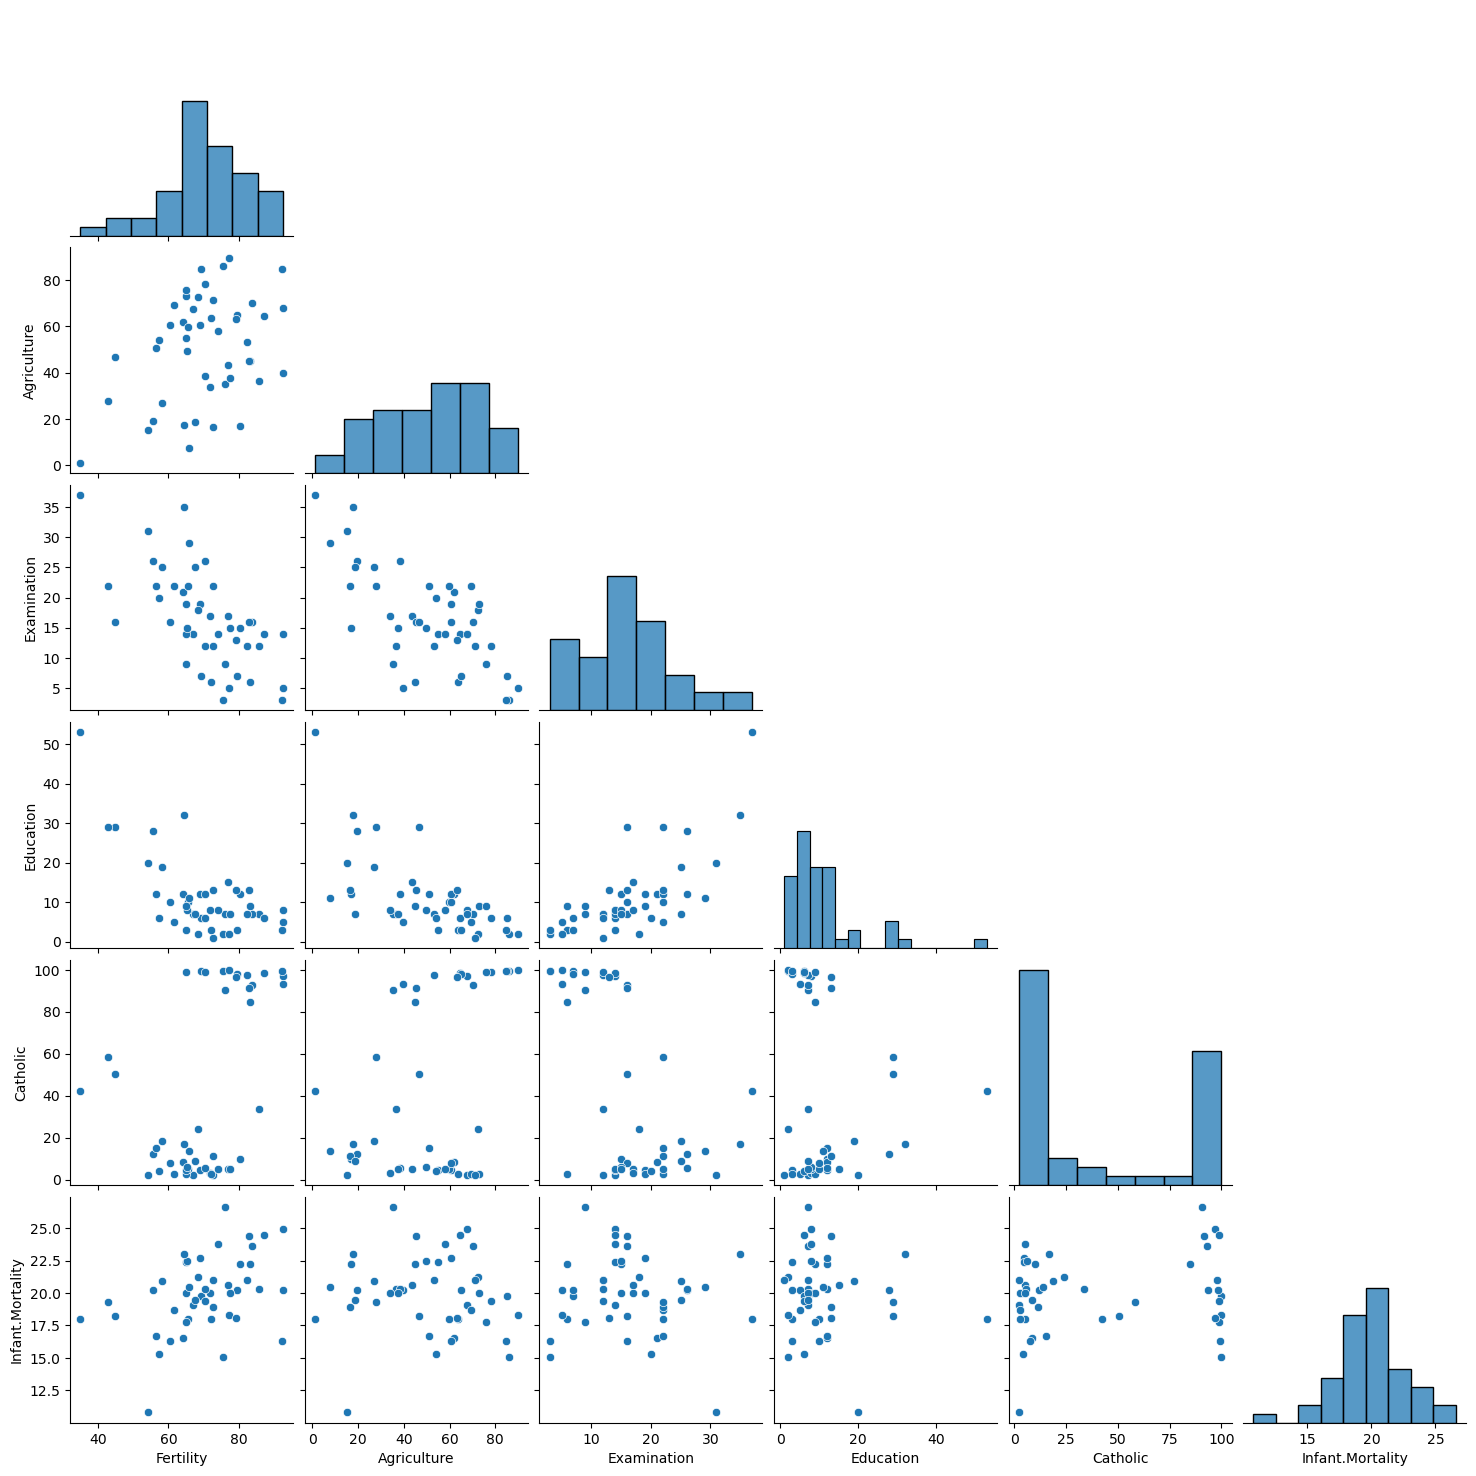

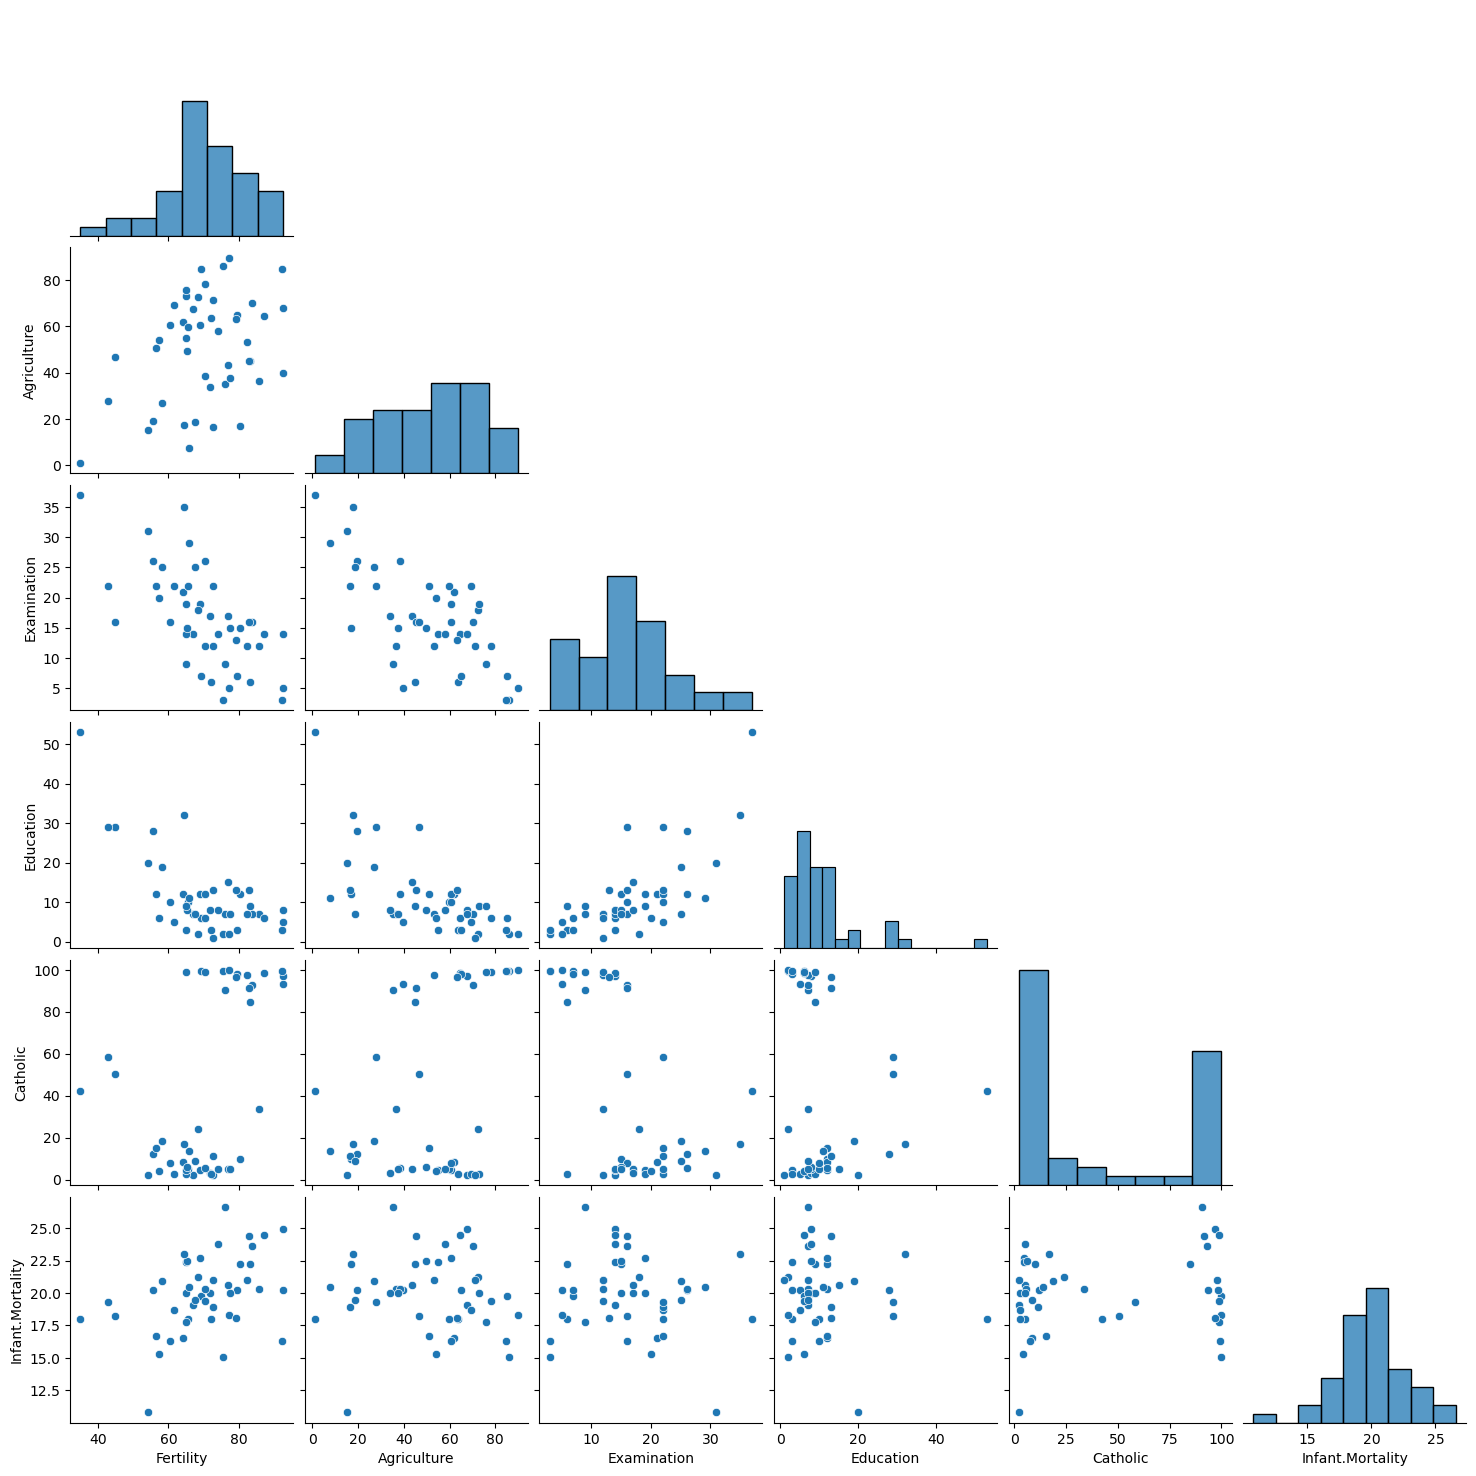

In [8]:
sns.pairplot(swiss, corner = True)
plt.show()

In [ ]:
#fertility v examination
#agriculture v educstion

H$_0$ : There is no linear relationship between fertility and examination
    
H$_a$ : There is a linear relationship between fertility and examination   

In [9]:
fertility = swiss.Fertility
examination = swiss.Examination

In [11]:
r, p = stats.pearsonr(fertility, examination)

In [12]:
# confidence level = 0.95
# alpha = 0.05

α = 0.05

In [13]:
if p < α:
    print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We can reject the null hypothesis


In [14]:
p

9.450437340690438e-07

In [15]:
r

-0.6458827064572875

H$_0$ : There is no linear relationship between agriculture and examination
    
H$_a$ : There is a linear relationship between agriculture and examination

In [17]:
α = 0.05

In [18]:
agriculture = swiss.Agriculture
examination = swiss.Examination

In [19]:
r, p = stats.pearsonr(agriculture, examination)

In [21]:
if p < α:
    print('We can reject the null hypothesis')
    print(f'Our p value is {p} and our pearson r is {r}')
else:
    print('We fail to reject the null hypothesis')

We can reject the null hypothesis
Our p value is 9.951515271339796e-08 and our pearson r is -0.6865422086171364


## Chi-Squared Testing

In [22]:
mpg = data('mpg')

In [23]:
# When we want to see if there is independence between two variables

In [24]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
mpg['auto_trans'] = mpg.trans.str.startswith('auto').astype(int)

In [ ]:
# we will create a table of counted observed values to test for
# the chi-squared statistic and associated p value

In [32]:
observed = pd.crosstab(mpg['year'], mpg['auto_trans'])
observed

auto_trans,0,1
year,,
1999,43,74
2008,34,83


H$_0$ : There is no relationship/dependancy between manufactured year and trans type
    
H$_a$ : There is a relationship/dependancy between manufactured year and trans type

In [29]:
α

0.05

In [33]:
stats.chi2_contingency(observed)

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

In [34]:
mpg.year.value_counts(normalize=True)

1999    0.5
2008    0.5
Name: year, dtype: float64

In [35]:
mpg.auto_trans.value_counts(normalize=True)

1    0.67094
0    0.32906
Name: auto_trans, dtype: float64

- The chi - squared statistic will calculate the difference between the expected, tottally independent version of the values versus what we actually observed

In [36]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [37]:
if p < α:
    print('We can reject the null hypothesis')
    print(f'Our p value is {p} and our chi-squared statistic is {chi2}')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


In [39]:
p

0.2657001056392438